In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # get probabilities for class 1

# Set a custom threshold (e.g., 0.7)
threshold = 0.6
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the classification
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[130  15]
 [ 34 121]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       145
           1       0.89      0.78      0.83       155

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



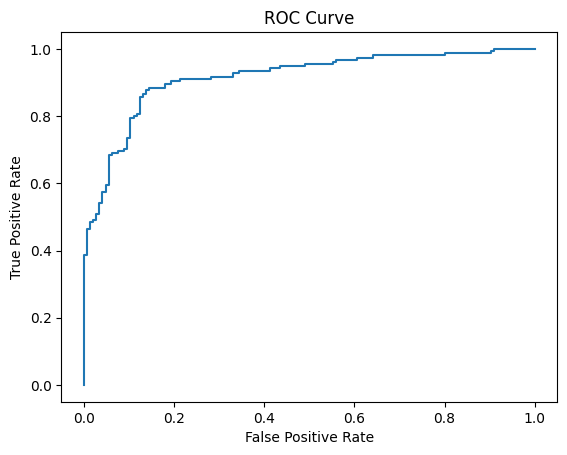

Area Under the ROC Curve (AUC): 0.91

Thresholds, False Positive and True Positive Rates:

Threshold: inf, FPR: 0.00, TPR: 0.00
Threshold: 1.00, FPR: 0.00, TPR: 0.01
Threshold: 0.96, FPR: 0.00, TPR: 0.39
Threshold: 0.96, FPR: 0.01, TPR: 0.39
Threshold: 0.94, FPR: 0.01, TPR: 0.46
Threshold: 0.94, FPR: 0.01, TPR: 0.46
Threshold: 0.94, FPR: 0.01, TPR: 0.48
Threshold: 0.94, FPR: 0.02, TPR: 0.48
Threshold: 0.93, FPR: 0.02, TPR: 0.49
Threshold: 0.93, FPR: 0.03, TPR: 0.49
Threshold: 0.92, FPR: 0.03, TPR: 0.51
Threshold: 0.92, FPR: 0.03, TPR: 0.51
Threshold: 0.91, FPR: 0.03, TPR: 0.54
Threshold: 0.90, FPR: 0.04, TPR: 0.54
Threshold: 0.87, FPR: 0.04, TPR: 0.57
Threshold: 0.87, FPR: 0.05, TPR: 0.57
Threshold: 0.86, FPR: 0.05, TPR: 0.59
Threshold: 0.86, FPR: 0.06, TPR: 0.59
Threshold: 0.77, FPR: 0.06, TPR: 0.68
Threshold: 0.76, FPR: 0.06, TPR: 0.68
Threshold: 0.75, FPR: 0.06, TPR: 0.69
Threshold: 0.74, FPR: 0.08, TPR: 0.69
Threshold: 0.74, FPR: 0.08, TPR: 0.70
Threshold: 0.74, FPR: 0.09, TPR: 0.7

In [13]:
# Get false positive rates, true positive rates, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve to analyze different thresholds
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, y_prob)
print(f"Area Under the ROC Curve (AUC): {auc:.2f}")
print()
print("Thresholds, False Positive and True Positive Rates:")
print()
for i in range(len(thresholds)):
    print(f"Threshold: {thresholds[i]:.2f}, FPR: {fpr[i]:.2f}, TPR: {tpr[i]:.2f}")